In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from env import user, password, host
from wrangle import wrangle_zillow
from prepare import train_validate_test_split
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor

In [2]:
df = wrangle_zillow()

df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips,transactiondate,County
0,2.0,3,1048,380118,1952,6037,2017-01-13,Los Angeles County
1,2.0,3,1324,518089,1963,6037,2017-01-13,Los Angeles County
3,3.0,4,2519,106406,1965,6037,2017-01-13,Los Angeles County
4,2.0,3,1285,369853,1955,6037,2017-01-13,Los Angeles County
5,1.0,3,1254,65848,1954,6037,2017-01-13,Los Angeles County


In [3]:
train, validate, test = train_validate_test_split(df)

train.shape, validate.shape, test.shape

((27773, 8), (11903, 8), (9920, 8))

In [5]:
train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips,transactiondate,County
51278,1.0,3,944,119668,1960,6111,2017-08-31,Ventura County
30633,2.0,4,2395,919553,1922,6037,2017-06-13,Los Angeles County
1069,2.5,3,1438,390871,1964,6059,2017-01-06,Orange County
5125,1.0,3,1142,58361,1947,6037,2017-02-15,Los Angeles County
15166,2.0,3,1279,396326,1956,6037,2017-03-24,Los Angeles County


In [40]:
X_train = train.drop(columns=['yearbuilt', 'fips', 'transactiondate','County', 'taxvaluedollarcnt'])
X_train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet
51278,1.0,3,944
30633,2.0,4,2395
1069,2.5,3,1438
5125,1.0,3,1142
15166,2.0,3,1279


In [41]:
#im going to try and scale the data 
import sklearn.preprocessing

In [42]:
#Assign the scaler to a variable, and fit/transform the training data
mms = sklearn.preprocessing.MinMaxScaler()

mms.fit(X_train)

train_mms = mms.transform(X_train)

In [43]:
#Is there a mistake here?
pd.DataFrame(train_mms, columns=list(X_train.columns)).head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet
0,0.0,0.4,0.108761
1,0.2,0.6,0.308020
2,0.3,0.4,0.176600
3,0.0,0.4,0.135952
4,0.2,0.4,0.154765


Text(0.5, 1.0, 'Scaled')

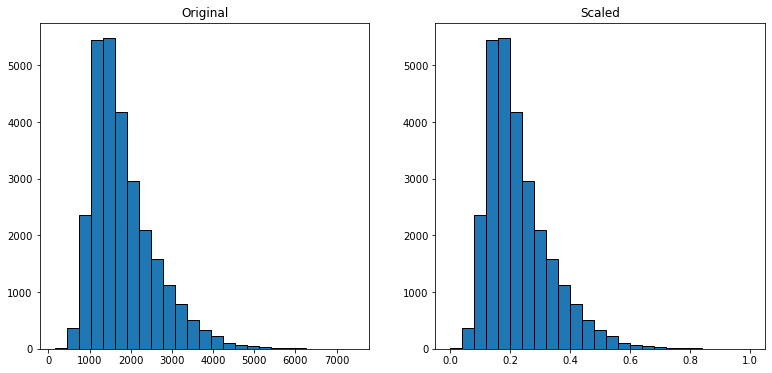

In [58]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train['calculatedfinishedsquarefeet'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_mms[:,2], bins=25, ec='black')
plt.title('Scaled')

In [45]:
ss = sklearn.preprocessing.StandardScaler()

ss.fit(X_train)

train_ss = ss.transform(X_train)

In [46]:
pd.DataFrame(train_ss, columns=list(X_train.columns)).head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet
0,-1.404694,-0.296815,-1.122393
1,-0.238643,0.838802,0.757239
2,0.344382,-0.296815,-0.482464
3,-1.404694,-0.296815,-0.865903
4,-0.238643,-0.296815,-0.688433


Text(0.5, 1.0, 'Scaled')

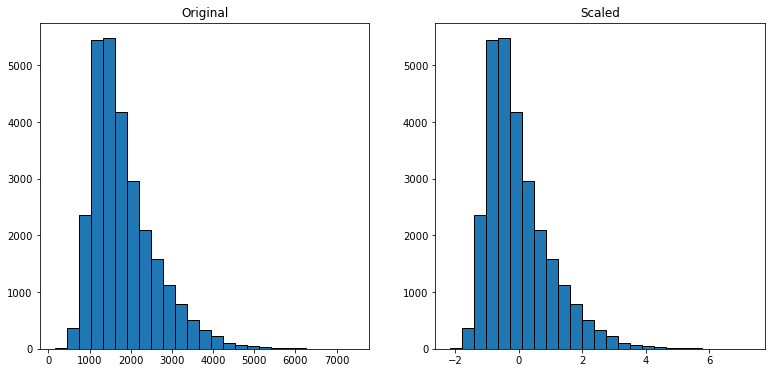

In [59]:
#Visualize the difference
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train['calculatedfinishedsquarefeet'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_ss[:,2], bins=25, ec='black')
plt.title('Scaled')

In [48]:
rs = sklearn.preprocessing.RobustScaler()

rs.fit(X_train)

train_rs = rs.transform(X_train)

In [49]:
pd.DataFrame(train_rs, columns=list(X_train.columns)).head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet
0,-1.0,0.0,-0.725910
1,0.0,1.0,0.827623
2,0.5,0.0,-0.197002
3,-1.0,0.0,-0.513919
4,0.0,0.0,-0.367238


Text(0.5, 1.0, 'Scaled')

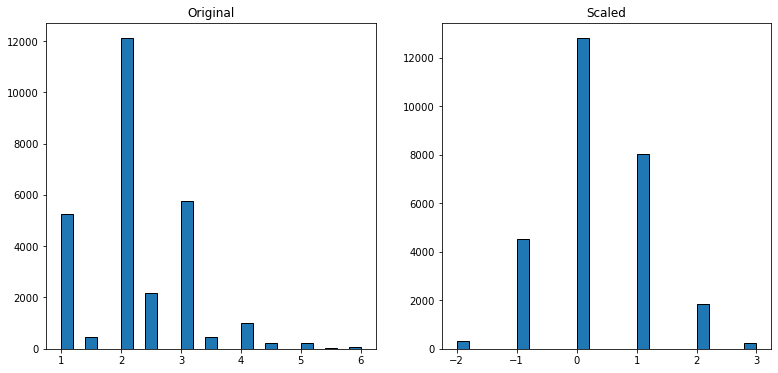

In [50]:
#Visualize the data before and after robust scaling
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train['bathroomcnt'], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_rs[:,1], bins=25, ec='black')
plt.title('Scaled')

In [51]:
mms.inverse_transform(train_mms)

array([[1.000e+00, 3.000e+00, 9.440e+02],
       [2.000e+00, 4.000e+00, 2.395e+03],
       [2.500e+00, 3.000e+00, 1.438e+03],
       ...,
       [2.000e+00, 4.000e+00, 1.485e+03],
       [2.000e+00, 3.000e+00, 1.512e+03],
       [1.000e+00, 3.000e+00, 1.180e+03]])

In [52]:
pd.DataFrame(mms.inverse_transform(train_mms))

,0,1,2
0,1.0,3.0,944.0
1,2.0,4.0,2395.0
2,2.5,3.0,1438.0
3,1.0,3.0,1142.0
4,2.0,3.0,1279.0
...,...,...,...
27768,3.0,6.0,3345.0
27769,2.0,3.0,1383.0
27770,2.0,4.0,1485.0
27771,2.0,3.0,1512.0


In [53]:
train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips,transactiondate,County
51278,1.0,3,944,119668,1960,6111,2017-08-31,Ventura County
30633,2.0,4,2395,919553,1922,6037,2017-06-13,Los Angeles County
1069,2.5,3,1438,390871,1964,6059,2017-01-06,Orange County
5125,1.0,3,1142,58361,1947,6037,2017-02-15,Los Angeles County
15166,2.0,3,1279,396326,1956,6037,2017-03-24,Los Angeles County


In [54]:
X_train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet
51278,1.0,3,944
30633,2.0,4,2395
1069,2.5,3,1438
5125,1.0,3,1142
15166,2.0,3,1279


In [28]:
from sklearn.preprocessing import MinMaxScaler

#Define function to scale all data based on the train subset
def scale_data(train, validate, test):
    
    scale_columns = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet']
    
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    mms = MinMaxScaler()
    
    mms.fit(train[scale_columns])
    
    train_scaled[scale_columns] = mms.transform(train[scale_columns])
    validate_scaled[scale_columns] = mms.transform(validate[scale_columns])
    test_scaled[scale_columns] = mms.transform(test[scale_columns])
    
    return train_scaled, validate_scaled, test_scaled

In [33]:
train_s, valid_s, test_s = scale_data(train, validate, test)

In [34]:
train_s.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips,transactiondate,County
51278,0.0,0.4,0.108761,119668,1960,6111,2017-08-31,Ventura County
30633,0.2,0.6,0.308020,919553,1922,6037,2017-06-13,Los Angeles County
1069,0.3,0.4,0.176600,390871,1964,6059,2017-01-06,Orange County
5125,0.0,0.4,0.135952,58361,1947,6037,2017-02-15,Los Angeles County
15166,0.2,0.4,0.154765,396326,1956,6037,2017-03-24,Los Angeles County


# Exploring the data 

What are we looking for innitally ?

We want to be able to predict the property tax assessed values `('taxvaluedollarcnt')` of Single Family Properties that had a transaction during 2017.

We have a model already, but we are hoping your insights can help us improve it. I need recommendations on a way to make a better model. Maybe you will create a new feature out of existing ones that works better, try a non-linear regression algorithm, or try to create a different model for each county. Whatever you find that works (or doesn't work) will be useful. Given you have just joined our team, we are excited to see your outside perspective.

One last thing, Zach lost the email that told us where these properties were located. Ugh, Zach :-/. Because property taxes are assessed at the county level, we would like to know what states and counties these are located in.

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27773 entries, 51278 to 48531
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   27773 non-null  float64
 1   bedroomcnt                    27773 non-null  int64  
 2   calculatedfinishedsquarefeet  27773 non-null  int64  
 3   taxvaluedollarcnt             27773 non-null  int64  
 4   yearbuilt                     27773 non-null  int64  
 5   fips                          27773 non-null  int64  
 6   transactiondate               27773 non-null  object 
 7   County                        27773 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 1.9+ MB


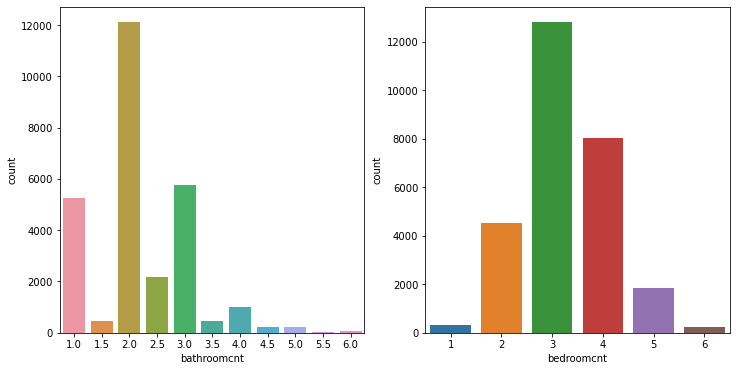

In [36]:
fig, ax =plt.subplots(1,2, figsize=(12,6))
sns.countplot(train['bathroomcnt'], ax=ax[0])
sns.countplot(train['bedroomcnt'], ax=ax[1])
fig.show()

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='Count'>

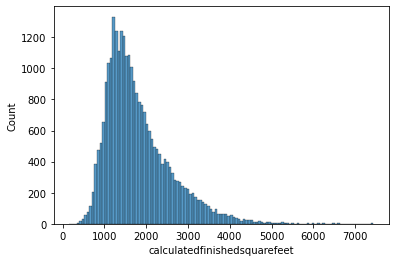

In [37]:
sns.histplot(data=train, x= 'calculatedfinishedsquarefeet')

In [ ]:
sns.histplot(data=train, x= 'calculatedfinishedsquarefeet')

<AxesSubplot:xlabel='County', ylabel='Count'>

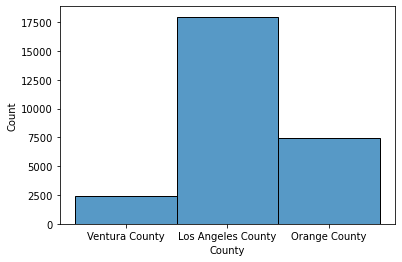

In [38]:
sns.histplot(data=train, x= 'County')

In [39]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
bathroomcnt,27773.0,2.204659,0.857611,1.0,2.0,2.0,3.0,6.0
bedroomcnt,27773.0,3.261369,0.880595,1.0,3.0,3.0,4.0,6.0
calculatedfinishedsquarefeet,27773.0,1810.442408,771.973503,152.0,1256.0,1622.0,2190.0,7434.0
taxvaluedollarcnt,27773.0,413377.641594,298187.380619,1000.0,184267.0,355000.0,564000.0,1498479.0
yearbuilt,27773.0,1962.948619,22.620826,1878.0,1950.0,1960.0,1978.0,2016.0
fips,27773.0,6049.210924,21.167338,6037.0,6037.0,6037.0,6059.0,6111.0


In [ ]:
train.corr()

In [ ]:
sns.heatmap(train.corr(), cmap='mako', center=0, annot=True)
plt.show()

In [60]:
train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips,transactiondate,County
51278,1.0,3,944,119668,1960,6111,2017-08-31,Ventura County
30633,2.0,4,2395,919553,1922,6037,2017-06-13,Los Angeles County
1069,2.5,3,1438,390871,1964,6059,2017-01-06,Orange County
5125,1.0,3,1142,58361,1947,6037,2017-02-15,Los Angeles County
15166,2.0,3,1279,396326,1956,6037,2017-03-24,Los Angeles County


Question 1- Is there a relationship with the number of bathrroms a property has and the property value ?
 - categorical & Quantative 
 - T TEST OR ANOVA
Question 2 - does a prperty with a certain number of bathrooms cause an increase in property value?
 - categorical & quant 
 - CHI SQARED 
Question 3- does the number of square feet have a relationship with the county the property is in?
- categorical and cont
- t test or anova
question 4- does the year the home was built have a relationship with area it is in ?
- cont& categorical 
- t test or anova 



##  Question 1- Is there a relationship with the number of bathrroms a property has and the county the property is in ?
 - categorical & Quantative 
 - T TEST OR ANOVA

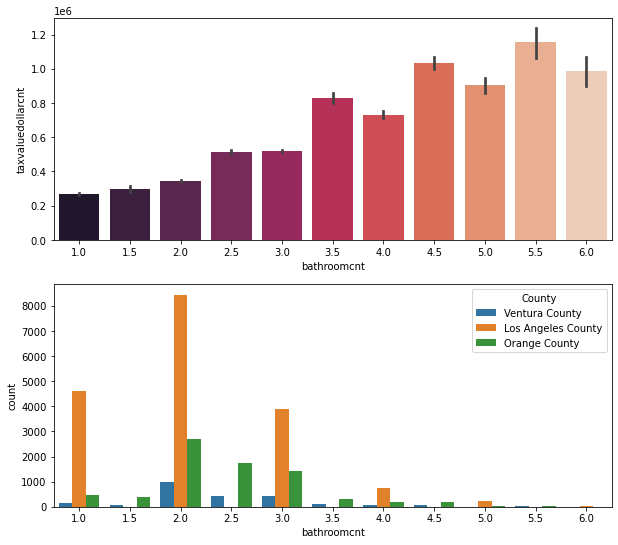

In [93]:
fig, ax =plt.subplots(2,1, figsize=(10,9))
sns.barplot(x= 'bathroomcnt', y='taxvaluedollarcnt', data=train, ax=ax[0], palette="rocket")
sns.countplot(x= 'bathroomcnt', hue = "County", data=train)
fig.show()

## Question 2 - does a prperty with a certain number of bedrroms cause an increase in property value?
 - categorical and quantaive 
 - t-test

<AxesSubplot:xlabel='bedroomcnt', ylabel='taxvaluedollarcnt'>

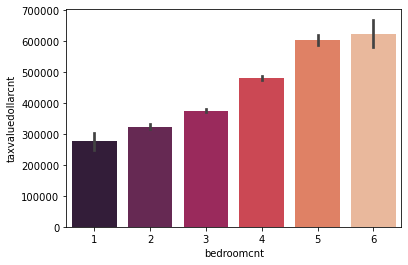

In [92]:
 sns.barplot(x= 'bedroomcnt', y='taxvaluedollarcnt', data=train, palette="rocket")

 which county hass the largest number of bedrooms ?

<AxesSubplot:xlabel='bedroomcnt', ylabel='count'>

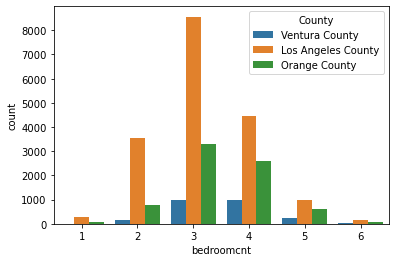

In [72]:
 sns.countplot(x= 'bedroomcnt', hue = "County", data=train)

## Question 3- does the number of square feet have a relationship with the county the property is in?
- categorical and cont
- t test or anova

<AxesSubplot:xlabel='County', ylabel='calculatedfinishedsquarefeet'>

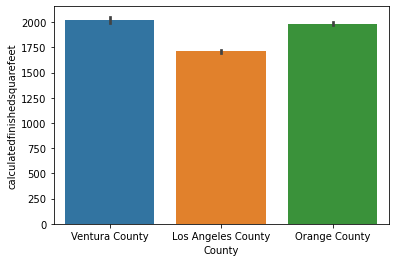

In [112]:
 sns.barplot(y= 'calculatedfinishedsquarefeet', x='County', data=train)

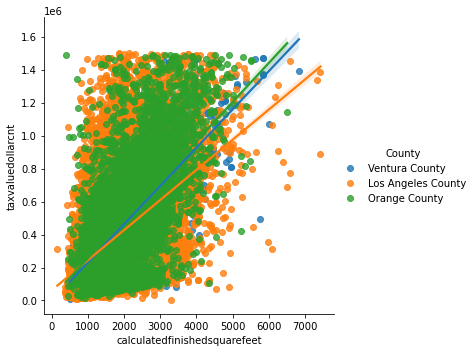

In [120]:
 sns.lmplot(y= 'taxvaluedollarcnt',x = 'calculatedfinishedsquarefeet', hue='County', data=train)

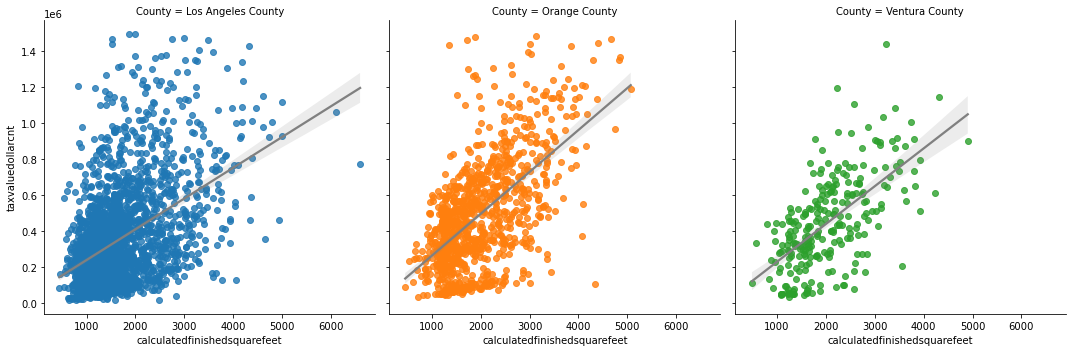

In [116]:
def plot_variable_pairs():
    columns = ['calculatedfinishedsquarefeet']
    for col in columns:
        sns.lmplot(x= col, y="taxvaluedollarcnt", data=train.sample(3500), col = 'County', hue = 'County', line_kws={'color': 'gray'})
        
plot_variable_pairs()

question 4- does the year the home was built have a relationship with area it is in ?
- cont& categorical 
- t test or anova 


In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27773 entries, 51278 to 48531
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   27773 non-null  float64
 1   bedroomcnt                    27773 non-null  int64  
 2   calculatedfinishedsquarefeet  27773 non-null  int64  
 3   taxvaluedollarcnt             27773 non-null  int64  
 4   yearbuilt                     27773 non-null  int64  
 5   fips                          27773 non-null  int64  
 6   transactiondate               27773 non-null  object 
 7   County                        27773 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 2.9+ MB


### Feaure Engeneering

In [121]:
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

In [139]:
X_train = train_s[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips']]
y_train = train_s.taxvaluedollarcnt
X_validate = valid_s[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips']]
y_validate = valid_s.taxvaluedollarcnt
X_test = test_s[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips']]
y_test = test_s.taxvaluedollarcnt

In [140]:
# Like our other sklearn objects...
kbest = SelectKBest(f_regression, k=2)
kbest.fit(X_train, y_train)

SelectKBest(k=2, score_func=<function f_regression at 0x176b71af0>)

In [141]:
kbest_results = pd.DataFrame(dict(p=kbest.pvalues_, f=kbest.scores_), index=X_train.columns)
kbest_results

,p,f
bathroomcnt,0.000000e+00,8007.694874
bedroomcnt,0.000000e+00,2008.928770
calculatedfinishedsquarefeet,0.000000e+00,11343.871085
fips,1.308526e-98,447.796415


In [142]:
X_train.columns[kbest.get_support()]

Index(['bathroomcnt', 'calculatedfinishedsquarefeet'], dtype='object')

In [143]:
X_train_transformed = pd.DataFrame(
    kbest.transform(X_train),
    index=X_train.index,
    columns=X_train.columns[kbest.get_support()]
)
X_train_transformed.head()

,bathroomcnt,calculatedfinishedsquarefeet
51278,0.0,0.108761
30633,0.2,0.308020
1069,0.3,0.176600
5125,0.0,0.135952
15166,0.2,0.154765


In [144]:
from sklearn.linear_model import LinearRegression

In [145]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=2)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=2)

In [146]:
pd.DataFrame({'rfe_ranking': rfe.ranking_}, index=X_train.columns)

,rfe_ranking
bathroomcnt,2
bedroomcnt,1
calculatedfinishedsquarefeet,1
fips,3


In [147]:
X_train.columns[rfe.get_support()]

Index(['bedroomcnt', 'calculatedfinishedsquarefeet'], dtype='object')

In [148]:
X_train_transformed = pd.DataFrame(
    rfe.transform(X_train),
    index=X_train.index,
    columns=X_train.columns[rfe.support_]
)
X_train_transformed.head()

,bedroomcnt,calculatedfinishedsquarefeet
51278,0.4,0.108761
30633,0.6,0.308020
1069,0.4,0.176600
5125,0.4,0.135952
15166,0.4,0.154765


In [149]:
model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=2, scoring='neg_mean_absolute_error', direction='backward')
sfs.fit(X_train, y_train)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select=2,
                          scoring='neg_mean_absolute_error')

In [150]:
X_train_transformed = pd.DataFrame(
    sfs.transform(X_train),
    index=X_train.index,
    columns=X_train.columns[sfs.support_]
)
X_train_transformed.head()

,bedroomcnt,calculatedfinishedsquarefeet
51278,0.4,0.108761
30633,0.6,0.308020
1069,0.4,0.176600
5125,0.4,0.135952
15166,0.4,0.154765


## Modeling 

In [ ]:
estabishing a baseline 

In [ ]:
X_train = train_s[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet']]
y_train = train_s.taxvaluedollarcnt
X_validate = valid_s[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet']]
y_validate = valid_s.taxvaluedollarcnt
X_test = test_s[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet']]
y_test = test_s.taxvaluedollarcnt

In [154]:
#making a baseline
from math import sqrt
from sklearn.metrics import mean_squared_error

In [163]:
baseline = train.taxvaluedollarcnt.mean()

train['baseline'] = baseline
validate['baseline'] = baseline

train_rmse = sqrt(mean_squared_error(train.taxvaluedollarcnt, train.baseline))
valid_rmse = sqrt(mean_squared_error(validate.taxvaluedollarcnt, validate.baseline))

print('Train baseline RMSE: {}.'.format(train_rmse))
print('Validation baseline RMSE: {}.'.format(valid_rmse))

Train baseline RMSE: 298182.01227437635.
Validation baseline RMSE: 302522.8095888484.


In [165]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [185]:
lm.coef_, lm.intercept_

(array([ 2.53851012e+05, -2.79395578e+05,  1.44833723e+06,  7.90300935e+02]),
 -4631969.127222786)

In [168]:
lars = LassoLars(alpha=1.0)

lars.fit(X_train, y_train)

LassoLars()

In [170]:
#Instantiate TweedieRegressor and fit
glm = TweedieRegressor(power=0, alpha=1)

glm.fit(X_train, y_train)

TweedieRegressor(alpha=1, power=0)

In [179]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27773 entries, 51278 to 48531
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   27773 non-null  float64
 1   bedroomcnt                    27773 non-null  int64  
 2   calculatedfinishedsquarefeet  27773 non-null  int64  
 3   taxvaluedollarcnt             27773 non-null  int64  
 4   yearbuilt                     27773 non-null  int64  
 5   fips                          27773 non-null  int64  
 6   transactiondate               27773 non-null  object 
 7   County                        27773 non-null  object 
 8   baseline                      27773 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 3.1+ MB


In [ ]:
X_train = train_s[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet']]
y_train = train_s.taxvaluedollarcnt
X_validate = valid_s[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet']]
y_validate = valid_s.taxvaluedollarcnt
X_test = test_s[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet']]
y_test = test_s.taxvaluedollarcnt

In [177]:
y_train.head()

51278    119668
30633    919553
1069     390871
5125      58361
15166    396326
Name: taxvaluedollarcnt, dtype: object

In [182]:
X_train.shape, X_validate.shape, X_test.shape

((27773, 4), (11903, 4), (9920, 4))